<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt
from itertools import repeat, chain

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification'

In [3]:
def prepare_train_set(path_to_csv_files, site_freq, session_length, window_size):
    data, user_ids = [], []

    users_list = glob(os.path.join(path_to_csv_files, '*.csv'))
    for user_id, csv_file in enumerate(sorted(users_list), start=1):
        sites = pd.read_csv(csv_file)['site'].values
        for i in range(0, len(sites), window_size):
            chunk = sites[i: i + session_length]
            session = [site_freq[chunk[i]][0] if i < chunk.shape[0] else 0 for i in range(session_length)]
                
            user_ids.append(user_id)
            data.append(session)
            
    return np.array(data), user_ids

In [4]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    assert session_length >= window_size
    
    with open(site_freq_path, 'rb') as f:
        site_freq = pickle.load(f)
        
    X, y = prepare_train_set(path_to_csv_files, site_freq, session_length, window_size)
    row_idx = np.fromiter(chain.from_iterable((repeat(i, session_length) for i in range(X.shape[0]))), dtype=int)
    col_idx = X.flatten()
    X_sparse = csr_matrix(([1]*(X.shape[0]*X.shape[1]), (row_idx, col_idx)), dtype=int)[:, 1:]
    
    return X_sparse, y 

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [5]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

In [6]:
X_toy_s5_w3.todense()

matrix([[0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1],
        [3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0],
        [1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
y_s5_w3

[1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3]

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [8]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    
    pbar = tqdm_notebook(itertools.product([10, 7, 5], [15, 10, 7, 5]))
    for window_size, session_length in pbar:
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            
            pbar.write(f'Processing {num_users} users with session length={session_length} and window size={window_size}')
            pbar.update(1)
            
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA, f'{num_users}users'), 
                                                          os.path.join(PATH_TO_DATA, f'site_freq_{num_users}users.pkl'),
                                                          session_length=session_length, window_size=window_size)
            
            data_lengths.append(X_sparse.shape[0])
            
            X_sparse_filename = f'X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl'
            y_filename = f'y_{num_users}users_s{session_length}_w{window_size}.pkl'
            
            with open(os.path.join(PATH_TO_DATA, X_sparse_filename), 'wb') as f:
                pickle.dump(X_sparse, f, protocol=2)
            with open(os.path.join(PATH_TO_DATA, y_filename), 'wb') as f:
                pickle.dump(y, f, protocol=2)

Processing 10 users with session length=15 and window size=10
Processing 10 users with session length=15 and window size=7
Processing 10 users with session length=10 and window size=7
Processing 10 users with session length=7 and window size=7
Processing 10 users with session length=15 and window size=5
Processing 10 users with session length=10 and window size=5
Processing 10 users with session length=7 and window size=5
Processing 10 users with session length=5 and window size=5



Processing 150 users with session length=15 and window size=10
Processing 150 users with session length=15 and window size=7
Processing 150 users with session length=10 and window size=7
Processing 150 users with session length=7 and window size=7
Processing 150 users with session length=15 and window size=5
Processing 150 users with session length=10 and window size=5
Processing 150 users with session length=7 and window size=5
Processing 150 users with session length=5 and window size=5

CPU times: user 28.1 s, sys: 699 ms, total: 28.8 s
Wall time: 28.8 s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [9]:
np.unique(data_lengths).shape[0]

6

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [10]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [11]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
1,193,579,134,3,134,134,3,134,204,134,1
2,415,192,684,254,134,31,397,3502,219,55,1
3,55,3,55,55,5,294,415,336,905,55,1
4,479,3503,479,55,55,55,55,953,200,123,1
5,343,55,5,3504,259,212,3505,2170,685,2170,1


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 1 to 14061
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [13]:
train_df['user_id'].value_counts()

7     2796
3     2204
8     1868
6     1712
9     1643
2     1022
4      802
1      760
5      720
10     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [14]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [15]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

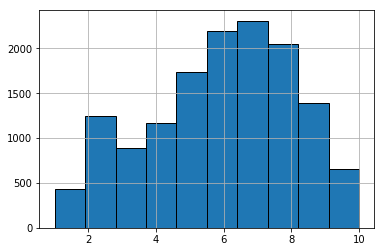

In [16]:
pd.Series(num_unique_sites).hist(edgecolor='black');

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [17]:
from scipy.stats import probplot, shapiro

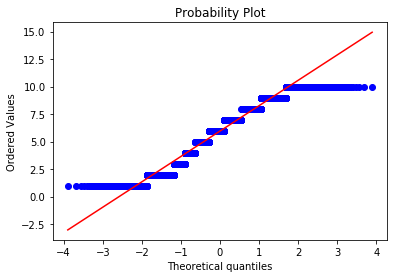

In [18]:
probplot(num_unique_sites, plot=plt);

In [19]:
shapiro(num_unique_sites)[1]

/usr/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [20]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [21]:
pi_val = stats.binom_test(has_two_similar.sum(), has_two_similar.shape[0], 0.95, alternative='greater')
pi_val

0.02207653769072678

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [22]:
wilson_interval = proportion_confint(has_two_similar.sum(), has_two_similar.shape[0], method='wilson')

In [23]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [24]:
with open('capstone_user_identification/site_freq_10users.pkl', 'rb') as f:
    site_freqs = dict(pickle.load(f).values())

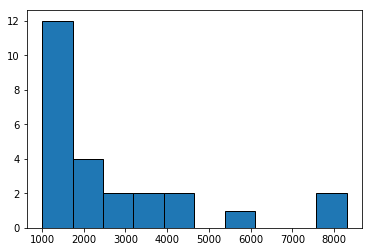

In [25]:
freqs1000 = [site_freqs[site_id] for site_id in site_freqs if site_freqs[site_id] >= 1000]
plt.hist(freqs1000, edgecolor='black');

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [26]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [27]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [28]:
freqs = np.fromiter(site_freqs.values(), dtype=int)

In [29]:
stat = np.fromiter(map(np.mean, get_bootstrap_samples(freqs, len(site_freqs))), dtype=float)

In [30]:
left, right = stat_intervals(stat, 0.05)
round(left, 3), round(right, 3)

(22.515, 35.763)

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.